In [53]:
semantic_network = nx.DiGraph()
relation_defs = {}

with open("../data/umls/SRDEF") as fp:
    for line in fp:
        line = line.split("|")
        
        if line[0] == 'STY':
            semantic_network.add_node(line[2], description=line[4])
        elif line[0] == 'RL':
            relation_defs[line[2]] = line[4]

In [56]:
with open("../data/umls/SRSTR") as fp:
    for line in fp:
        src, rel, dst, st, _ = line.split("|")
        if src in semantic_network and dst in semantic_network:
            semantic_network.add_edge(src, dst, label=rel, status=st, description=relation_defs[rel])

In [87]:
from pydot import Dot, Node, Edge

class JDot(Dot):
    def __init__(self, scale=1, rankdir='TB'):
        super().__init__(rankdir=rankdir)
        self.scale = scale
    
    def _repr_svg_(self):
        return self.create_svg().decode('utf8').replace("scale(1 1)", "scale(%f, %f)" % (self.scale, self.scale))

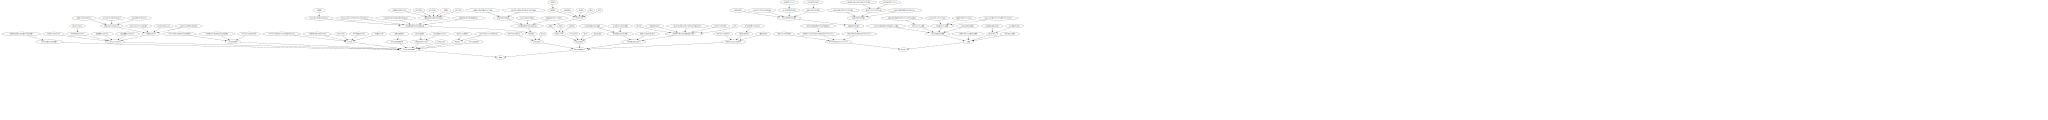

In [94]:
graph = JDot(scale=0.5, rankdir='TB')

for node in semantic_network.nodes:
    graph.add_node(Node(node))
    
for u,v in semantic_network.edges:
    attrs = semantic_network.get_edge_data(u,v)
    
    if attrs['label'] == 'isa':
        graph.add_edge(Edge(src=u, dst=v))
#     else:
#         graph.add_edge(Edge(src=u, dst=v, style='dashed', label=attrs['label']))
    
graph